In [1]:
import pandas as pd
import numpy as np
from numpy import where
import collections
from collections import Counter
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv('/Users/mac/Desktop/TFG/data/tables/SPAIN/household/2017/EPFhogar_2017.csv',sep="\t")

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_19865/3405708257.py:1: DtypeWarning: Columns (96) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/Users/mac/Desktop/TFG/data/tables/SPAIN/household/2017/EPFhogar_2017.csv',sep="\t")


In [3]:
df

ANOENC  NUMERO  CCAA  NUTS1  CAPROV  TAMAMU  DENSIDAD  CLAVE  CLATEO  \
0        2017       1    10      5       6       3         2      1       2   
1        2017       2    12      1       1       1         1      2       2   
2        2017       3    13      3       1       1         1      1       2   
3        2017       4     7      4       6       5         3      1       1   
4        2017       5    12      1       6       4         2      2       2   
...       ...     ...   ...    ...     ...     ...       ...    ...     ...   
22038    2017   22039     5      7       6       4         2      1       2   
22039    2017   22040     9      5       1       1         1      1       2   
22040    2017   22041     2      2       6       4         3      1       1   
22041    2017   22042     3      1       6       5         3      2       2   
22042    2017   22043    16      2       6       2         1      2       2   

            FACTOR  ...  FUENPRIN  FUENPRINRED  IMPEXAC  INTERIN  NUMPERI  \
0      1257.790204  ...         2            2     2246        5        2   
1       652.571321  ...         3            3      658        2        2   
2      1420.519339  ...         3            3     3400        7        2   
3       571.238405  ...         2            2     1206        3        1   
4       526.837839  ...         2            2     1500        4        1   
...            ...  ...       ...          ...      ...      ...      ...   
22038   385.435963  ...         2            2     2172        5        2   
22039  1726.272004  ...         3            3      854        2        1   
22040   275.211950  ...         1            1     2227        5        2   
22041   650.836996  ...         2            2     1000        3        1   
22042   220.231674  ...         2            2     2200        5        2   

       COMIMH  COMISD  COMIHU  COMIINV  COMITOT  
0          12       0       0        0       12  
1          56       0       0        0       56  
2          43       2       0        8       53  
3          23       0       0        0       23  
4          50       0       0        0       50  
...       ...     ...     ...      ...      ...  
22038     139       0       0        0      139  
22039      52       0       0        0       52  
22040     108       0       0        0      108  
22041      64       0       0       10       74  
22042      76       0       0       29      105  

[22043 rows x 188 columns]

In [4]:
for col in df.columns:
    print(col)

ANOENC
NUMERO
CCAA
NUTS1
CAPROV
TAMAMU
DENSIDAD
CLAVE
CLATEO
FACTOR
NMIEMB
TAMANO
NMIEMSD
NMIEMHU
NMIEMIN
NMIEM1
NMIEM2
NMIEM3
NMIEM4
NMIEM5
NMIEM6
NMIEM7
NMIEM8
NMIEM9
NMIEM10
NMIEM11
NMIEM12
NMIEM13
NUMACTI
NUMINACTI
NUMOCU
NUMNOCU
NUMESTU
NUMNOESTU
NNINOSD
NHIJOSD
UC1
UC2
PF2TEO
PF2RECO
TIPHOGAR1
TIPHOGAR2
TIPHOGAR3
TIPHOGAR4
TIPHOGAR5
TIPHOGAR6
TIPHOGAR7
TIPHOGAR8
TIPHOGAR9
TIPHOGAR10
TIPHOGAR11
SITUOCUHOG
SITUACTHOG
NORDENSP
EDADSP
SEXOSP
PAISNACSP
NACIONASP
PAISSP
SITURESSP
ECIVILLEGALSP
NORDENCOSP
UNIONSP
CONVIVENCIASP
NORDENPASP
PAISPADRESP
NORDENMASP
PAISMADRESP
ESTUDIOSSP
ESTUDREDSP
SITUACTSP
SITUREDSP
OCUSP
JORNADASP
PERCEPSP
IMPEXACPSP
INTERINPSP
TRABAJO
OCUPA
OCUPARED
ACTESTB
ACTESTBRED
SITPROF
SECTOR
CONTRATO
TIPOCONT
SITSOCI
SITSOCIRE
REGTEN
TIPOEDIF
ZONARES
TIPOCASA
NHABIT
ANNOCON
SUPERF
AGUACALI
FUENAGUA
CALEF
FUENCALE
DISPOSIOV
NUMOVD
REGTENV1
MESESV1
DIASV1
AGUACV1
FUENACV1
CALEFV1
FUENCAV1
REGTENV2
MESESV2
DIASV2
AGUACV2
FUENACV2
CALEFV2
FUENCAV2
REGTENV3
MESESV3
DI

In [5]:
var17=df[['TAMANO','NMIEMSD','UC1','UC2','ESTUDIOSSP','SITUACTSP','JORNADASP','IMPEXACPSP','OCUPA','SITPROF','SECTOR','TIPOEDIF','ZONARES','TIPOCASA','NHABIT','SUPERF','NUMOVD','CAPROP','CAJENA','PENSIO','FUENPRIN']]
var17

TAMANO  NMIEMSD  UC1  UC2  ESTUDIOSSP  SITUACTSP JORNADASP  IMPEXACPSP  \
0           3        0  2.2  1.8           7          1         1        -9.0   
1           2        0  1.7  1.5           5          4                 329.0   
2           2        0  1.7  1.5           7          4                1800.0   
3           1        0  1.0  1.0           3          1         1        -9.0   
4           2        0  1.7  1.5           7          1         1      1500.0   
...       ...      ...  ...  ...         ...        ...       ...         ...   
22038       5        0  3.4  2.6           4          1         1        -9.0   
22039       2        0  1.7  1.5           4          4                  -9.0   
22040       4        0  2.9  2.3           6          1         1        -9.0   
22041       3        0  2.2  1.8           7          1         1      1000.0   
22042       4        0  2.7  2.1           7          1         1      1200.0   

      OCUPA SITPROF  ... TIPOEDIF  ZONARES  TIPOCASA  NHABIT  SUPERF  NUMOVD  \
0         4       1  ...        3        3         2       6     106     NaN   
1         9       1  ...        4        3         2       5      -9     NaN   
2         2       1  ...        4        3         2       6     120     NaN   
3         7       1  ...        1        7         1       6     150     NaN   
4         3       1  ...        4        3         2       6     120     NaN   
...     ...     ...  ...      ...      ...       ...     ...     ...     ...   
22038     3       1  ...        4        3         3       5     101     NaN   
22039     1       3  ...        3        3         3       2      45     NaN   
22040     2       2  ...        2        3         2       6     130     NaN   
22041     4       1  ...        2        5         2       5      90     NaN   
22042     2       1  ...        3        3         2       4      75     NaN   

       CAPROP  CAJENA  PENSIO  FUENPRIN  
0           1       1       6         2  
1           6       6       1         3  
2           6       6       1         3  
3           6       1       6         2  
4           6       1       6         2  
...       ...     ...     ...       ...  
22038       6       1       6         2  
22039       6       6       1         3  
22040       1       1       6         1  
22041       6       1       6         2  
22042       6       1       6         2  

[22043 rows x 21 columns]

In [6]:
null_counts = var17.isnull().sum()
print(null_counts)

TAMANO            0
NMIEMSD           0
UC1               0
UC2               0
ESTUDIOSSP        0
SITUACTSP         0
JORNADASP         0
IMPEXACPSP      178
OCUPA             0
SITPROF           0
SECTOR            0
TIPOEDIF          0
ZONARES           0
TIPOCASA          0
NHABIT            0
SUPERF            0
NUMOVD        18460
CAPROP            0
CAJENA            0
PENSIO            0
FUENPRIN          0
dtype: int64


In [7]:
var17=var17.fillna(0)
var17.isnull().sum()

TAMANO        0
NMIEMSD       0
UC1           0
UC2           0
ESTUDIOSSP    0
SITUACTSP     0
JORNADASP     0
IMPEXACPSP    0
OCUPA         0
SITPROF       0
SECTOR        0
TIPOEDIF      0
ZONARES       0
TIPOCASA      0
NHABIT        0
SUPERF        0
NUMOVD        0
CAPROP        0
CAJENA        0
PENSIO        0
FUENPRIN      0
dtype: int64

In [8]:
print(var17.describe())

             TAMANO       NMIEMSD           UC1           UC2    ESTUDIOSSP  \
count  22043.000000  22043.000000  22043.000000  22043.000000  22043.000000   
mean       2.621558      0.001361      2.064982      1.738983      3.936442   
std        1.209988      0.038078      0.787432      0.543076      1.724332   
min        1.000000      0.000000      1.000000      1.000000      1.000000   
25%        2.000000      0.000000      1.700000      1.500000      3.000000   
50%        2.000000      0.000000      1.700000      1.500000      3.000000   
75%        4.000000      0.000000      2.700000      2.100000      5.000000   
max        6.000000      2.000000      7.400000      5.400000      8.000000   

          SITUACTSP    IMPEXACPSP      TIPOEDIF       ZONARES      TIPOCASA  \
count  22043.000000  22043.000000  22043.000000  22043.000000  22043.000000   
mean       2.413011    548.832600      3.023046      3.643606      1.936715   
std        1.725621    848.680436      1.067292    

              TAMANO   NMIEMSD       UC1       UC2  ESTUDIOSSP  SITUACTSP  \
TAMANO      1.000000  0.002317  0.983193  0.971296    0.096889  -0.367481   
NMIEMSD     0.002317  1.000000  0.004464  0.005552   -0.011811   0.043919   
UC1         0.983193  0.004464  1.000000  0.997727    0.072404  -0.338458   
UC2         0.971296  0.005552  0.997727  1.000000    0.062962  -0.326299   
ESTUDIOSSP  0.096889 -0.011811  0.072404  0.062962    1.000000  -0.385098   
SITUACTSP  -0.367481  0.043919 -0.338458 -0.326299   -0.385098   1.000000   
IMPEXACPSP  0.005518  0.000407  0.004914  0.005003    0.118517  -0.005255   
TIPOEDIF   -0.062453 -0.009702 -0.073071 -0.077427    0.171607  -0.066185   
ZONARES    -0.005180 -0.004967  0.001816  0.004961   -0.231972   0.085430   
TIPOCASA   -0.067437 -0.014519 -0.071685 -0.074199   -0.162572   0.039450   
NHABIT      0.181326  0.002521  0.195549  0.201239    0.022575   0.052268   
SUPERF      0.150920  0.002083  0.158387  0.161507    0.135666  -0.035251   

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_19865/3930548804.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(var17.corr())
/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_19865/3930548804.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(var17.corr(), annot=True, cmap='coolwarm')


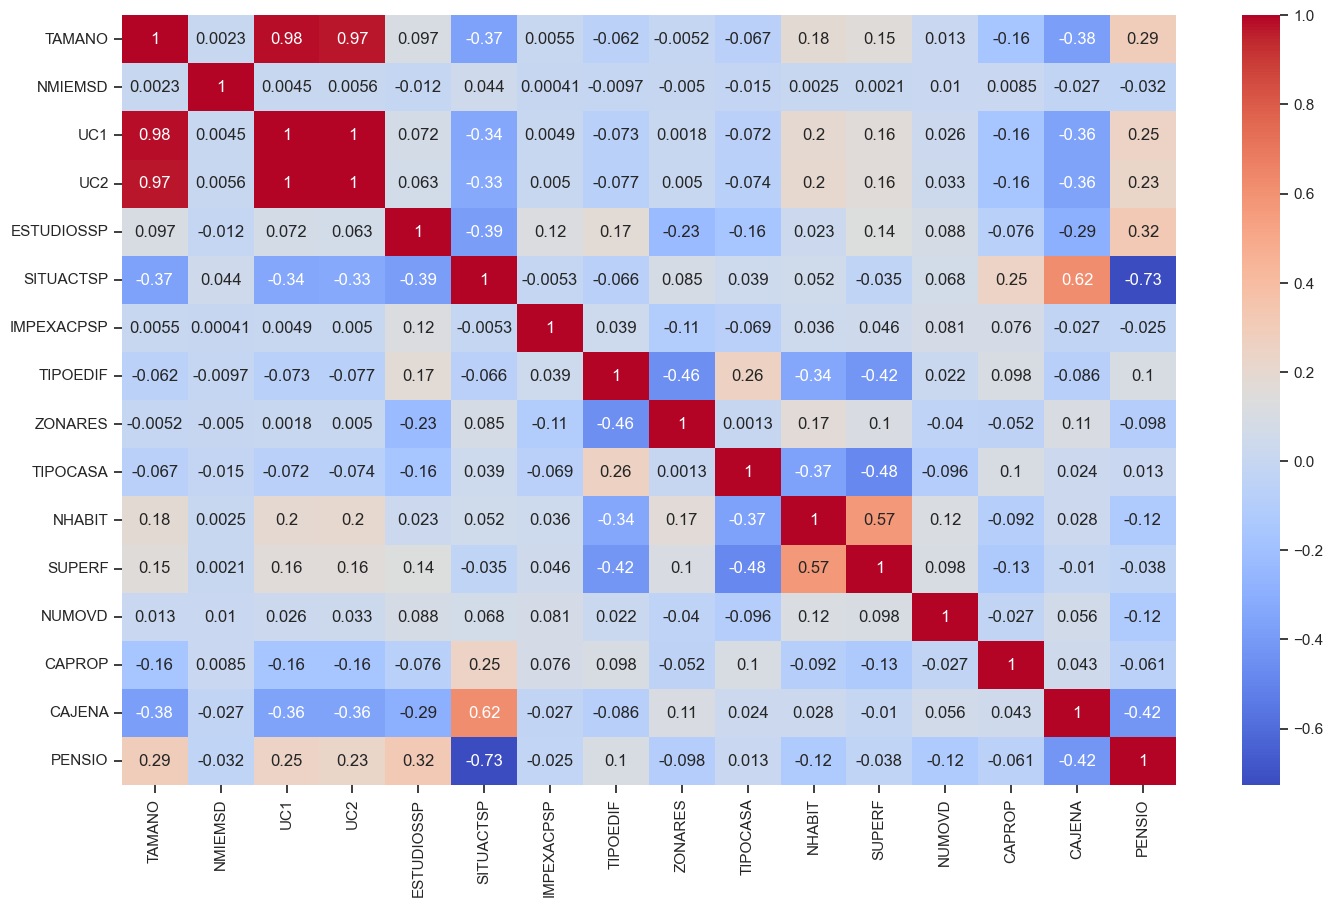

In [9]:
print(var17.corr())
sns.set(style="ticks")
plt.figure(figsize=(17,10))
sns.heatmap(var17.corr(), annot=True, cmap='coolwarm')
plt.show()

In [10]:
var17.drop(['UC1'], axis=1, inplace=True)

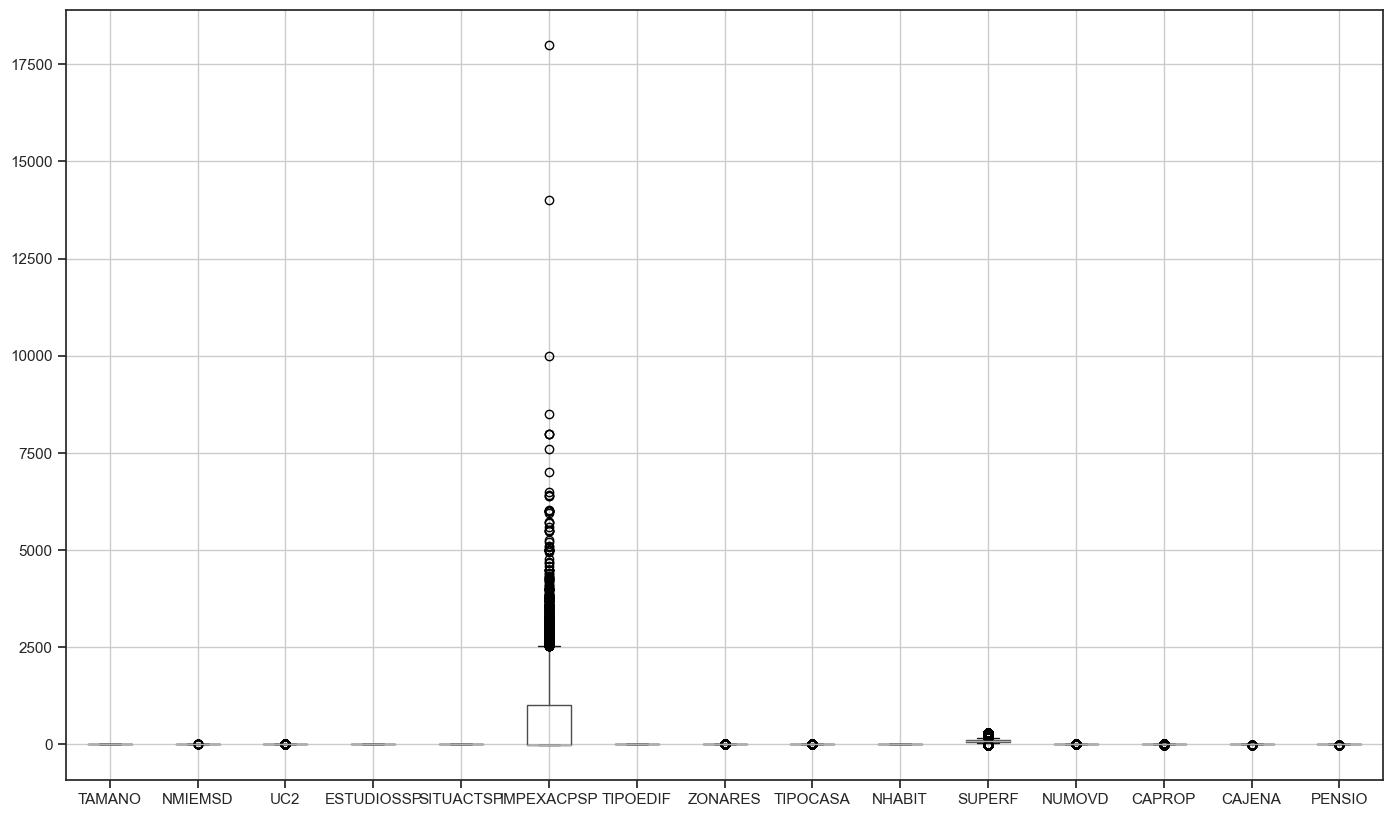

In [11]:
var17.boxplot(figsize=(17,10))
plt.show()

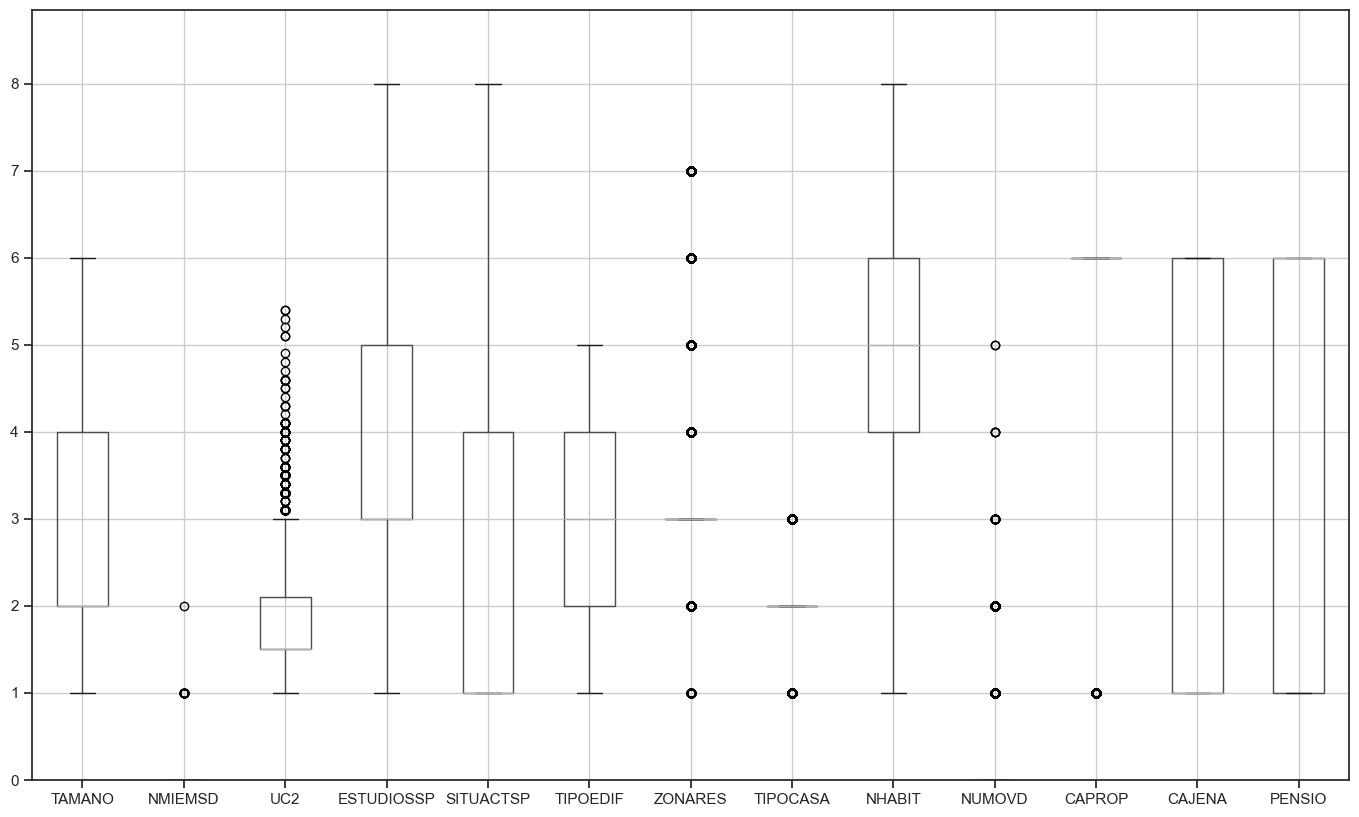

In [12]:
box=var17.drop(['IMPEXACPSP','SUPERF'],axis=1)
box.boxplot(figsize=(17,10))
plt.ylim(0, None)
plt.show()

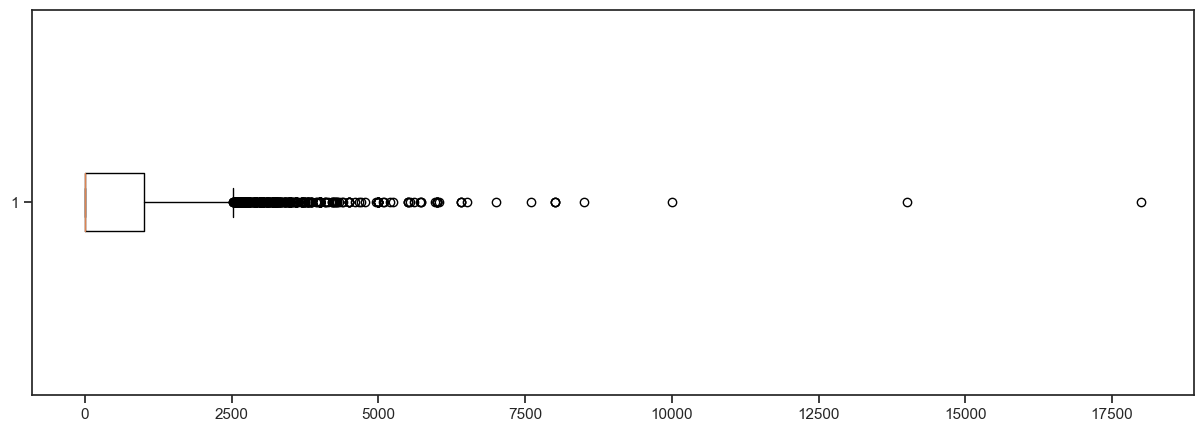

In [13]:
plt.boxplot(var17['IMPEXACPSP'],vert=False)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show()

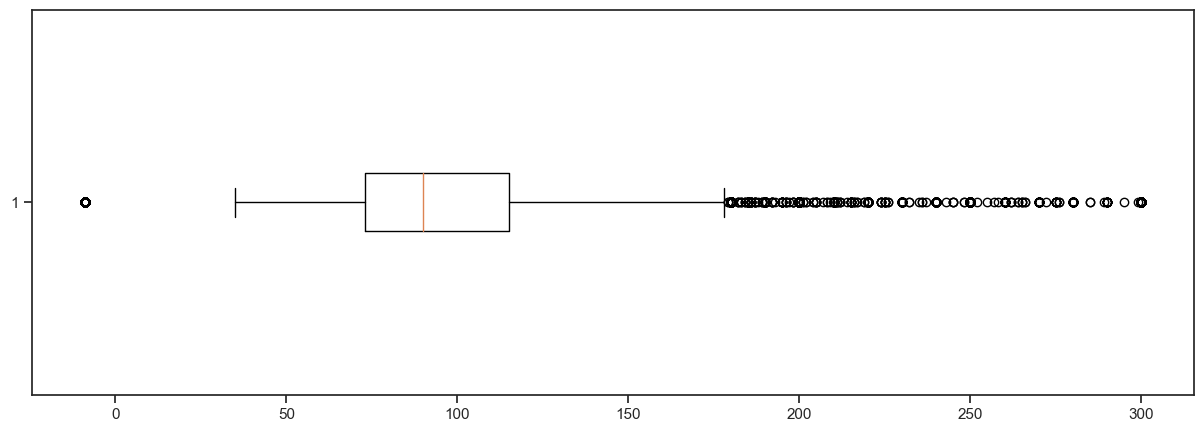

In [14]:
plt.boxplot(var17['SUPERF'],vert=False)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show()

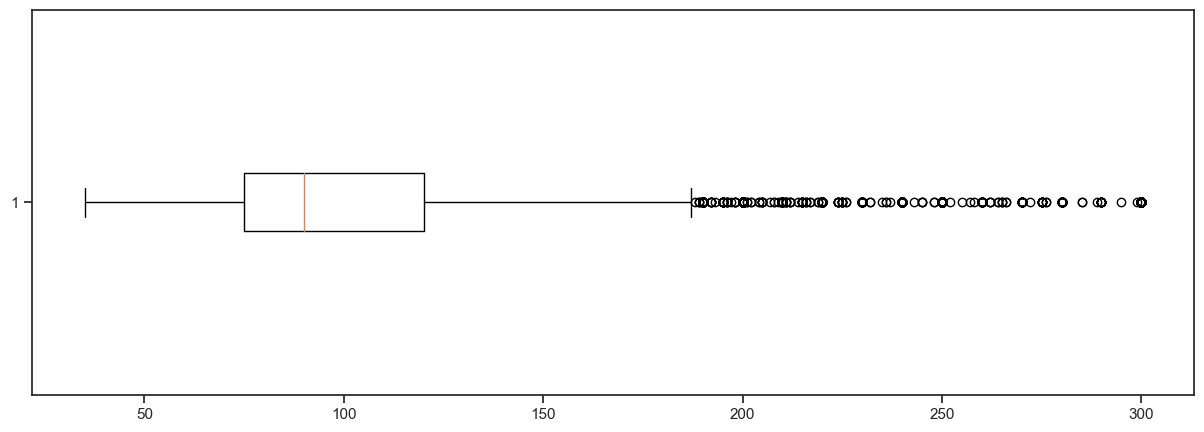

In [15]:
var17 = var17[var17['SUPERF'] != -9]
plt.boxplot(var17['SUPERF'],vert=False)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show()

In [16]:
null_counts = var17.isna().sum()
print(null_counts)

TAMANO        0
NMIEMSD       0
UC2           0
ESTUDIOSSP    0
SITUACTSP     0
JORNADASP     0
IMPEXACPSP    0
OCUPA         0
SITPROF       0
SECTOR        0
TIPOEDIF      0
ZONARES       0
TIPOCASA      0
NHABIT        0
SUPERF        0
NUMOVD        0
CAPROP        0
CAJENA        0
PENSIO        0
FUENPRIN      0
dtype: int64


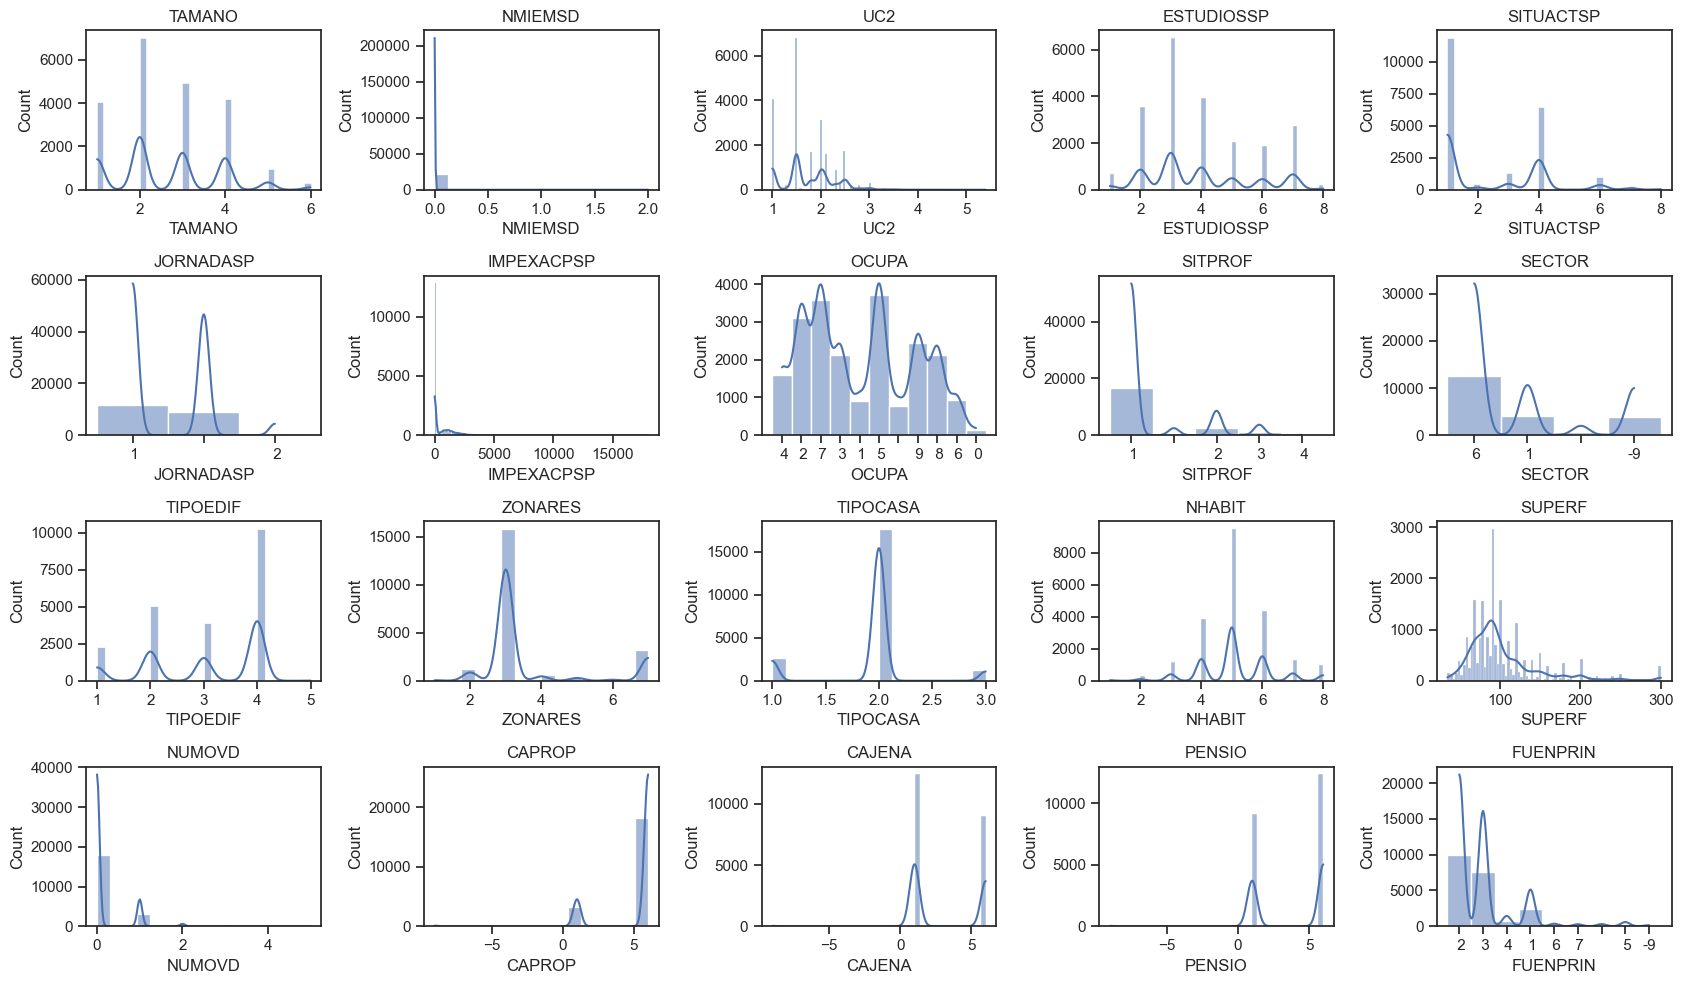

In [17]:
num_rows = 4
num_cols = 5
variable_names = list(var17.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(17, 10))
for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=var17[var_name], ax=ax, kde=True)
    ax.set_title(var_name)
plt.tight_layout()
plt.show()

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_19865/2428966826.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=var17['IMPEXACPSP'], shade=True)


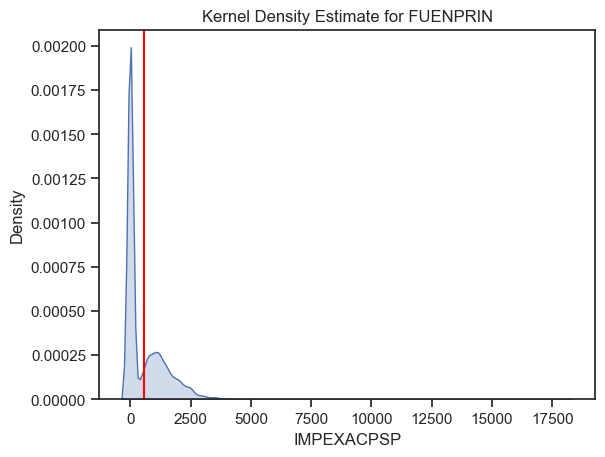

In [18]:
sns.kdeplot(data=var17['IMPEXACPSP'], shade=True)
mean_value = var17['IMPEXACPSP'].mean()
plt.axvline(x=mean_value, color='red')
plt.title(f"Kernel Density Estimate for {var_name}")
plt.show()

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_19865/902812558.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=var17['SUPERF'], shade=True)


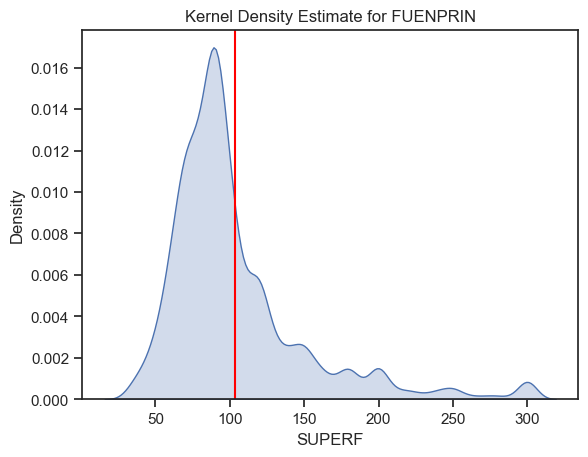

In [19]:
sns.kdeplot(data=var17['SUPERF'], shade=True)
mean_value = var17['SUPERF'].mean()
plt.axvline(x=mean_value, color='red')
plt.title(f"Kernel Density Estimate for {var_name}")
plt.show()

In [20]:
var17 = var17.replace('  ', pd.NaT)
var17 = var17.fillna(0.0).astype(float)

In [21]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(var17)

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

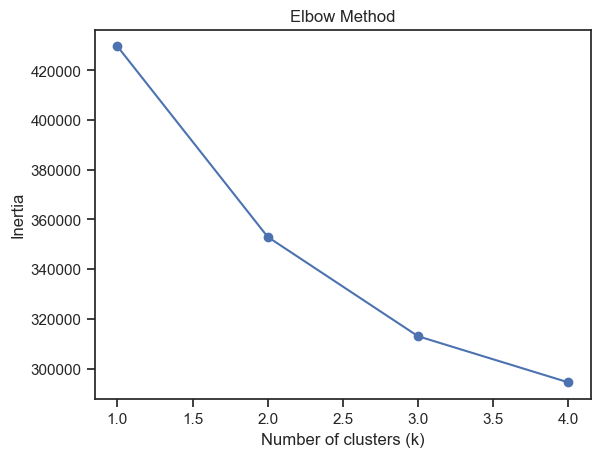

In [22]:
inertia = []
k_values = list(range(1, 5)) 
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [23]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


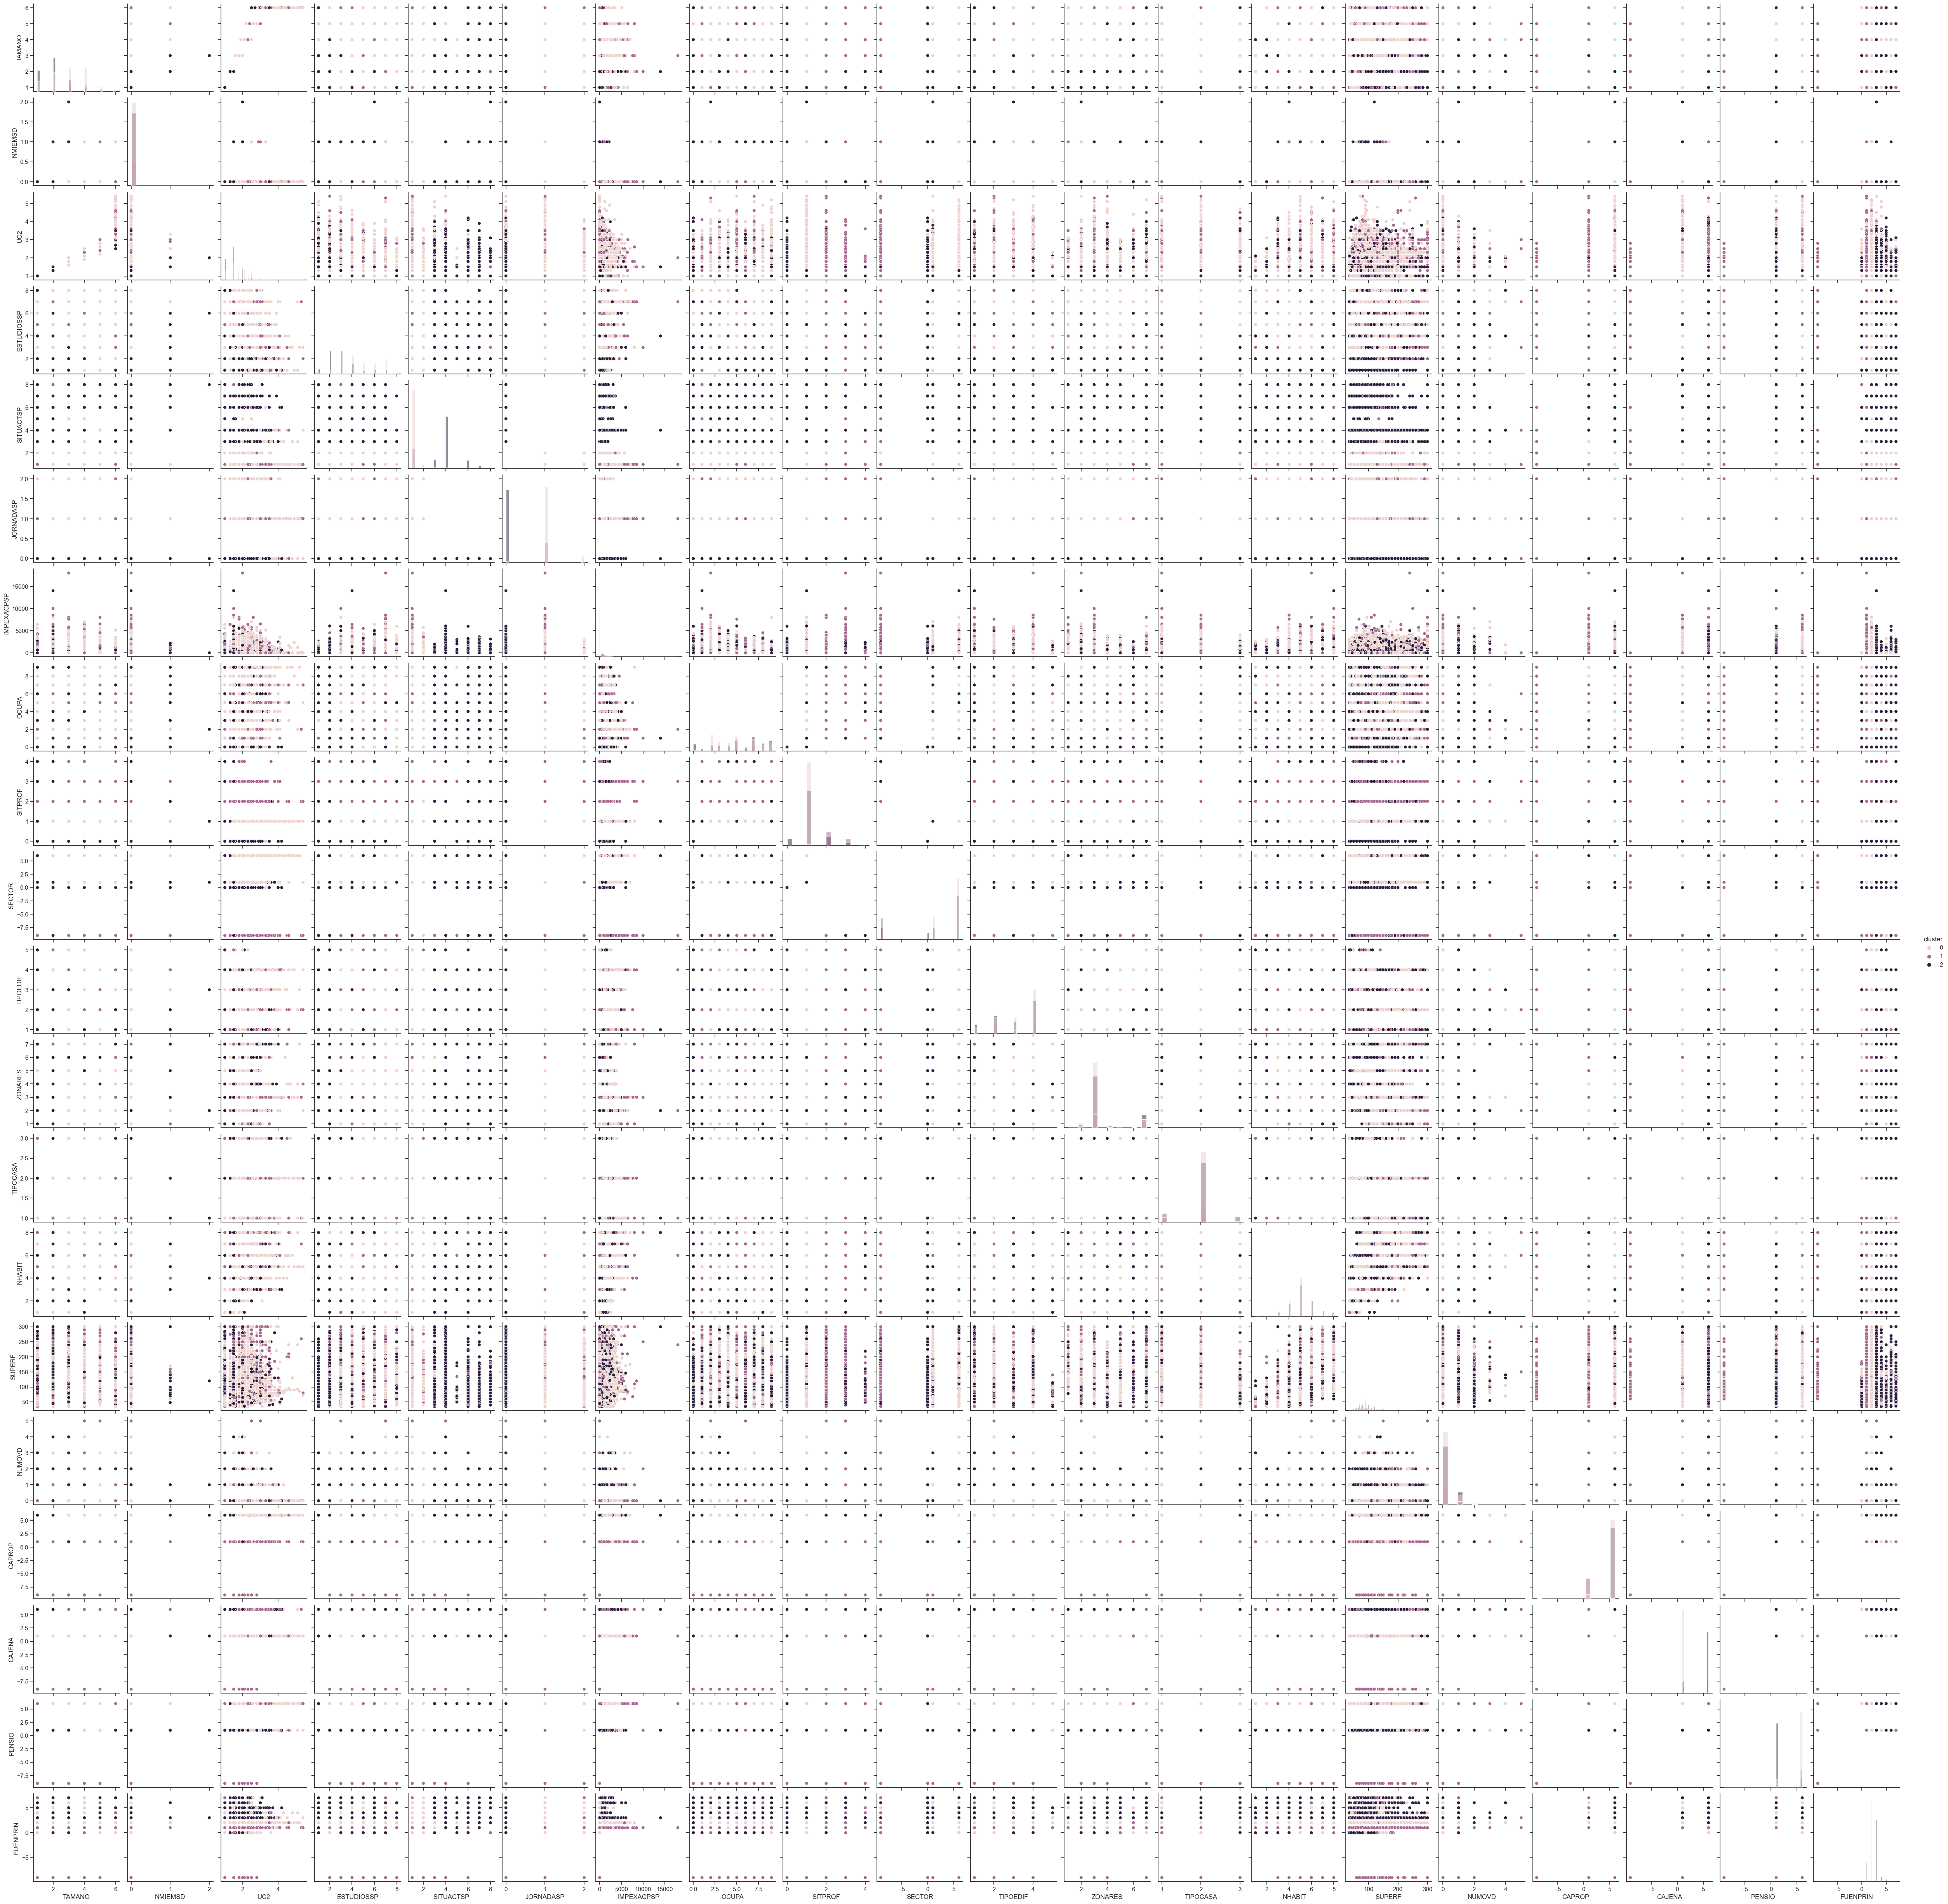

In [24]:
var17_clustered = var17.copy()
var17_clustered['cluster'] = kmeans_clusters
sns.pairplot(var17_clustered, hue='cluster', diag_kind='hist')
plt.show()

K-means Silhouette Score: 0.2178175592416377


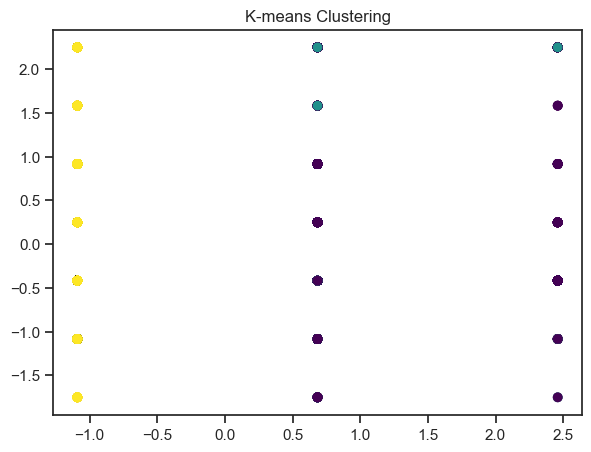

In [25]:
kmeans_silhouette = silhouette_score(data_scaled, kmeans_clusters)
print(f"K-means Silhouette Score: {kmeans_silhouette}")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:, 5], data_scaled[:, 11], c=kmeans_clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.show()

In [26]:
var17_clustered['cluster'].value_counts()

0    10077
2     8778
1     2625
Name: cluster, dtype: int64

In [27]:
mean_income = var17_clustered.groupby('cluster')['IMPEXACPSP'].mean()
print(mean_income)

cluster
0    599.515233
1    367.385524
2    555.627250
Name: IMPEXACPSP, dtype: float64


In [29]:
var17_clustered['cluster'] = var17_clustered['cluster'].replace({0:3, 1:1, 2:2})
var17_clustered['cluster'].value_counts()

3    10077
2     8778
1     2625
Name: cluster, dtype: int64

# Sexual harrassment
There are 8,018 female victims of sexual harassment in 2017 in the SPAIN